In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import svm

In [2]:
cancer_data = load_breast_cancer()

In [3]:
cancer_data.data.shape

(569, 30)

In [4]:
scaler = StandardScaler().fit(cancer_data.data)
data_scaled = scaler.transform(cancer_data.data)

In [5]:
X_train_orig, X_test_orig, y_train, y_test = train_test_split(
    data_scaled,cancer_data.target,stratify = cancer_data.target,
    shuffle = True,random_state=144)


In [6]:
rf_orig = RandomForestClassifier(oob_score=True)
rf_orig = rf_orig.fit(X_train_orig, y_train)
print("Training set score: {:.3f}".format(rf_orig.score(X_train_orig, y_train)))
print("Test set score: {:.3f}".format(rf_orig.score(X_test_orig, y_test)))
print("OOB score: {:.3f}".format(rf_orig.oob_score_) )

Training set score: 1.000
Test set score: 0.923
OOB score: 0.944


C:\Users\MASTER\Anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\MASTER\Anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [7]:
pca = PCA(n_components=5)
pca.fit(data_scaled)
data_reduced = pca.transform(data_scaled)
print("Original shape: {}".format(str(data_scaled.shape)))
print("Reduced shape: {}".format(str(data_reduced.shape)))


Original shape: (569, 30)
Reduced shape: (569, 5)


In [8]:
df = pd.DataFrame(data_reduced,columns=['component1','component2','component3',
                                       'component4','component5'])
df['target'] = cancer_data.target

In [9]:
df.shape

(569, 6)

C:\Users\MASTER\Anaconda3\envs\fastai\lib\site-packages\pandas\plotting\_core.py:186: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


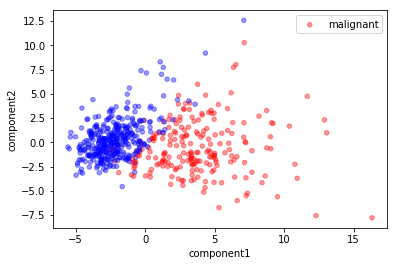

In [10]:
df.plot(kind="scatter", x="component1", y="component2", alpha=0.4,
        label="malignant",colors = np.where(df['target'] == 0, 'r', 'b')
)

In [11]:
X_train_pca, X_test_pca = train_test_split(
    df.drop('target',axis=1),stratify = df['target'],
    shuffle = True,random_state=144)


In [12]:

rf_pca = RandomForestClassifier(oob_score=True)
rf_pca = rf_pca.fit(X_train_pca, y_train)
print("Training set score: {:.3f}".format(rf_pca.score(X_train_pca, y_train)))
print("Test set score: {:.3f}".format(rf_pca.score(X_test_pca, y_test)))
print("OOB score: {:.3f}".format(rf_pca.oob_score_) )


Training set score: 1.000
Test set score: 0.951
OOB score: 0.913


C:\Users\MASTER\Anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\MASTER\Anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [13]:
pred_orig = rf_orig.predict(X_test_orig)
confusion = confusion_matrix(y_test, pred_orig)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[48  5]
 [ 6 84]]


In [14]:
pred_pca = rf_pca.predict(X_test_pca)
confusion = confusion_matrix(y_test, pred_pca)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[51  2]
 [ 5 85]]


In [15]:
svm_model = svm.LinearSVC(C=100.0).fit(X_train_orig,y_train)
pred_svm = svm_model.predict(X_test_orig)
print(f1_score(y_test, pred_svm))
pred_orig = svm_model.predict(X_test_orig)
confusion_matrix(y_test, pred_orig)


0.9497206703910613


array([[49,  4],
       [ 5, 85]], dtype=int64)

In [16]:
svm_model_pca = svm.LinearSVC(C=100.0).fit(X_train_pca,y_train)
pred_svm_pca = svm_model_pca.predict(X_test_pca)
print(f1_score(y_test, pred_svm_pca))
pred_pca = svm_model_pca.predict(X_test_pca)
confusion_matrix(y_test, pred_pca)

0.9775280898876404


array([[52,  1],
       [ 3, 87]], dtype=int64)

In [17]:
svm_model = svm.LinearSVC(C=1.0)
svm_model.fit(X_train_orig, y_train)
print("Train set accuracy: {:.2f}".format(svm_model.score(X_train_orig, y_train)))
print("Test set accuracy: {:.2f}".format(svm_model.score(X_test_orig, y_test)))
pred_svm = svm_model.predict(X_test_orig)
confusion = confusion_matrix(y_test, pred_svm)
print("Confusion matrix:\n{}".format(confusion))

Train set accuracy: 0.99
Test set accuracy: 0.97
Confusion matrix:
[[49  4]
 [ 1 89]]


In [22]:
svm_model = svm.LinearSVC(C=30.0)
svm_model.fit(X_train_pca, y_train)
print("Train set accuracy: {:.2f}".format(svm_model.score(X_train_pca, y_train)))
print("Test set accuracy: {:.2f}".format(svm_model.score(X_test_pca, y_test)))
pred_svm = svm_model.predict(X_test_pca)
confusion = confusion_matrix(y_test, pred_svm)
print("Confusion matrix:\n{}".format(confusion))

Train set accuracy: 0.96
Test set accuracy: 0.98
Confusion matrix:
[[50  3]
 [ 0 90]]


In [23]:
def plot_pca_accuracy(model,train,test,ytrain,ytest):
    components = []
    scores = []
    for c in range(5,25):
        pca = PCA(n_components=c,whiten=True, random_state=0).fit(train)
        Xtrain = pca.transform(train)
        Xtest = pca.transform(test)
        model.fit(Xtrain, ytrain)
        score = model.score(Xtest,ytest)
        scores.append(score)
        components.append(c)
    plt.plot(components,scores,label="train accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("components")

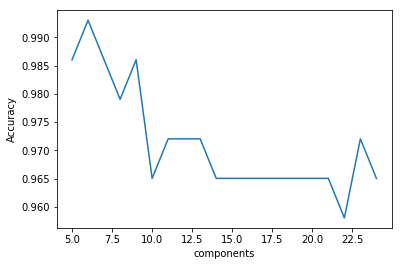

In [24]:
plot_pca_accuracy(svm.LinearSVC(C=1.0),X_train_orig,X_test_orig,y_train,y_test)


In [25]:
pca = PCA(n_components=6, whiten=True, random_state=0).fit(X_train_orig)
Xtrain = pca.transform(X_train_orig)
Xtest = pca.transform(X_test_orig)
svm_model = svm.LinearSVC(C=1.0)
svm_model.fit(Xtrain, y_train)
print(svm_model.score(Xtest,y_test))
pred_svm = svm_model.predict(Xtest)
confusion = confusion_matrix(y_test, pred_svm)
print("Confusion matrix:\n{}".format(confusion))

0.993006993006993
Confusion matrix:
[[52  1]
 [ 0 90]]


In [ ]:
plot_pca_accuracy(RandomForestClassifier(oob_score=True),X_train_orig,X_test_orig,y_train,y_test)

In [33]:
pca = PCA(n_components=6, whiten=True, random_state=0).fit(X_train_orig)
Xtrain = pca.transform(X_train_orig)
Xtest = pca.transform(X_test_orig)
rf_model = RandomForestClassifier(n_estimators=2000)
rf_model.fit(Xtrain, y_train)
print(rf_model.score(Xtest,y_test))
pred_rf = rf_model.predict(Xtest)
confusion = confusion_matrix(y_test, pred_rf)
print("Confusion matrix:\n{}".format(confusion))

0.958041958041958
Confusion matrix:
[[48  5]
 [ 1 89]]
